# ESCOLA NACIONAL DE ADMINISTRAÇÃO PÚBLICA - ENAP
### ESPECIALIZAÇÃO EM CIÊNCIA DE DADOS APLICADA A POLÍTICAS PÚBLICAS

D6 – ESTATÍSTICA DESCRITIVA - TRABALHO FINAL

PROFESSOR: EDUARDO MONTEIRO DE CASTRO GOMES

ALUNA: MONICA RONDINA

SET/2021

## **Contextualização do problema**

O trabalho propõe comparar dados da execução dos programas **Luz para Todos** e **Mais Luz para a Amazônia** como valores investidos e quantidade de ligações de energia realizadas, por localidade, com a evolução dos indicadores socioeconômicos.O objetivo de uma política pública é promover o bem-estar da sociedade por meio do atendimento das demandas para as quais está voltada, e espera-se que os programas de governo incrementem o desenvolvimento social e econômico nas comunidades beneficiadas, contribuindo para a redução da pobreza, para o aumento da renda familiar e favorecendo a permanência das pessoas no campo. 

## **Apresentação dos dados utilizados**

**Fonte de dados**
Dados abertos do Ministério de Minas e Energia dos programas Luz para Todos e Mais Luz para a Amazônia:
https://www.gov.br/mme/pt-br/acesso-a-informacao/dados-abertos/programas-luz-para-todos-e-mais-luz-para-amazonia
O MME publica duas bases, uma contendo as quantidades ligações realizadas pelo programa em cada um dos municípios e outra com os valores contratuais

Atlas Brasil de Desenvolvimento Humano:
http://www.atlasbrasil.org.br
Nesse portal foram realizadas duas consultas, uma agregada por município e outra por unidade da federação, com informações de IDHM,IDHM Renda, Renda per capta, População. Muitas das informações só estavam detalhadas a nível municípal até o ano de 2010 (possivelmente por não ter sido realizado censo em 2020)

IBGE:
Informações do Pib dos municípios. Possui detalhamento a nível municipal até o ano de 2018.
https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=resultados

# **• Importação e limpeza dos conjuntos de dados.**

In [155]:
from google.colab import files
import pandas as pd 
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
LPT1=pd.read_excel('https://github.com/monicarondina/Teste/raw/main/Lpt1domiciliosatendidos.xlsx',dtype={'lpt1qtddomicilios':float,'lpt1ano':str})

In [157]:
LPT2=pd.read_excel('https://github.com/monicarondina/Teste/raw/main/Lpt2recursosaplicados.xlsx',na_values="NULL")

In [158]:
AtlasBR=pd.read_excel('https://github.com/monicarondina/Teste/raw/main/AtlasBR.xlsx',skipfooter=3)

In [159]:
AtlasUF=pd.read_excel('https://github.com/monicarondina/Teste/raw/main/AtlasUF.xlsx')

In [160]:
Pib18=pd.read_excel('https://github.com/monicarondina/Teste/raw/main/Pib%202018.xls')
Pib09=pd.read_excel('https://github.com/monicarondina/Teste/raw/main/Pib%202009.xls')

**Limpeza dos dados:**
Para as bases de dados baixadas do Atlas Brasil de Desenvolvimento Humano foi feita, previamente, no aplicativo Excel, a exclusão das colunas que não continham dados a nível muncipal ou estadual;
Para as bases relativas ao Pib dos municípios, também foram excluídas, diretamente no excell, as colunas que não seriam utilizadas neste trabalho.
As base do luz para todos e do Atlas Brasil não possuiam a informação do código do muncípio, então o cruzamento entre elas
terá que ser feito pelo nome do município e respectiva unidade da federação, considerando que há municípios com o mesmo nome em diferentes estados.
Para isso, foi preciso uniformizar o formato entre elas. Foi adotado como padrão o formato do Atlas Brasil,com o nome do município seguido da sigla do estado entre parênteses. Ao carregar as bases AtlasBR e AtlasUF, foi excluída a primeira linha, que continha os dados a nível de Brasil, a fim de manter apenas, respectivamente, os dados municipais e estaduais. 

In [161]:
AtlasBR=AtlasBR.drop(0)
AtlasUF=AtlasUF.drop(0)

In [162]:
LPT1['lpt1estado']=LPT1['lpt1estado'].map({'Acre':' (AC)','Alagoas':' (AL)','Amapá':' (AP)','Amazonas':' (AM)','Bahia':' (BA)','Ceará':' (CE)','Espírito Santo':' (ES)','Goiás':' (GO)','Maranhão':' (MA)','Mato Grosso':' (MT)','Mato Grosso do Sul':' (MS)','Minas Gerais':' (MG)','Pará':' (PA)','Paraíba':' (PB)','Paraná':' (PR)','Pernambuco':' (PE)','Piauí':' (PI)','Rio de Janeiro':' (RJ)','Rio Grande do Sul':' (RS)','Rio Grande do Norte':' (RN)','Rondônia':' (RO)','Roraima':' (RR)','Santa Catarina':' (SC)','São Paulo':' (SP)','Sergipe':' (SE)','Tocantins':' (TO)','Distrito Federal':' (DF)'})

In [163]:
LPT1['lpt1municipio']=LPT1['lpt1municipio']+LPT1['lpt1estado']

In [164]:
LPT2['lpt2estado']=LPT2['lpt2estado'].map({'Acre':' (AC)','Alagoas':' (AL)','Amapá':' (AP)','Amazonas':' (AM)','Bahia':' (BA)','Ceará':' (CE)','Espírito Santo':' (ES)','Goiás':' (GO)','Maranhão':' (MA)','Mato Grosso':' (MT)','Mato Grosso do Sul':' (MS)','Minas Gerais':' (MG)','Pará':' (PA)','Paraíba':' (PB)','Paraná':' (PR)','Pernambuco':' (PE)','Piauí':' (PI)','Rio de Janeiro':' (RJ)','Rio Grande do Sul':' (RS)','Rio Grande do Norte':' (RN)','Rondônia':' (RO)','Roraima':' (RR)','Santa Catarina':' (SC)','São Paulo':' (SP)','Sergipe':' (SE)','Tocantins':' (TO)','Distrito Federal':' (DF)'})

In [165]:
Pib18['Unidade da Federação']=Pib18['Unidade da Federação'].map({'Acre':' (AC)','Alagoas':' (AL)','Amapá':' (AP)','Amazonas':' (AM)','Bahia':' (BA)','Ceará':' (CE)','Espírito Santo':' (ES)','Goiás':' (GO)','Maranhão':' (MA)','Mato Grosso':' (MT)','Mato Grosso do Sul':' (MS)','Minas Gerais':' (MG)','Pará':' (PA)','Paraíba':' (PB)','Paraná':' (PR)','Pernambuco':' (PE)','Piauí':' (PI)','Rio de Janeiro':' (RJ)','Rio Grande do Sul':' (RS)','Rio Grande do Norte':' (RN)','Rondônia':' (RO)','Roraima':' (RR)','Santa Catarina':' (SC)','São Paulo':' (SP)','Sergipe':' (SE)','Tocantins':' (TO)','Distrito Federal':' (DF)'})
Pib18['Nome do Município']=Pib18['Nome do Município']+Pib18['Unidade da Federação']
Pib09['Unidade da Federação']=Pib09['Unidade da Federação'].map({'Acre':' (AC)','Alagoas':' (AL)','Amapá':' (AP)','Amazonas':' (AM)','Bahia':' (BA)','Ceará':' (CE)','Espírito Santo':' (ES)','Goiás':' (GO)','Maranhão':' (MA)','Mato Grosso':' (MT)','Mato Grosso do Sul':' (MS)','Minas Gerais':' (MG)','Pará':' (PA)','Paraíba':' (PB)','Paraná':' (PR)','Pernambuco':' (PE)','Piauí':' (PI)','Rio de Janeiro':' (RJ)','Rio Grande do Sul':' (RS)','Rio Grande do Norte':' (RN)','Rondônia':' (RO)','Roraima':' (RR)','Santa Catarina':' (SC)','São Paulo':' (SP)','Sergipe':' (SE)','Tocantins':' (TO)','Distrito Federal':' (DF)'})
Pib09['Nome do Município']=Pib09['Nome do Município']+Pib18['Unidade da Federação']

In [166]:
AtlasUF['Territorialidades']=AtlasUF['Territorialidades'].map({'Acre':' (AC)','Alagoas':' (AL)','Amapá':' (AP)','Amazonas':' (AM)','Bahia':' (BA)','Ceará':' (CE)','Espírito Santo':' (ES)','Goiás':' (GO)','Maranhão':' (MA)','Mato Grosso':' (MT)','Mato Grosso do Sul':' (MS)','Minas Gerais':' (MG)','Pará':' (PA)','Paraíba':' (PB)','Paraná':' (PR)','Pernambuco':' (PE)','Piauí':' (PI)','Rio de Janeiro':' (RJ)','Rio Grande do Sul':' (RS)','Rio Grande do Norte':' (RN)','Rondônia':' (RO)','Roraima':' (RR)','Santa Catarina':' (SC)','São Paulo':' (SP)','Sergipe':' (SE)','Tocantins':' (TO)','Distrito Federal':' (DF)','Brasil':' (BR)'})

In [167]:
AtlasBR = AtlasBR.rename(columns={'Territorialidades': 'Municipio'})
AtlasUF = AtlasUF.rename(columns={'Territorialidades': 'Estado'})
LPT1=LPT1.rename(columns={'lpt1municipio':'Municipio','lpt1estado':'Estado'})
LPT2=LPT2.rename(columns={'lpt2estado':'Estado'})
Pib18=Pib18.rename(columns={'Nome do Município':'Municipio','Sigla da Unidade da Federação ':'Estado'})
Pib09=Pib09.rename(columns={'Nome do Município':'Municipio','Sigla da Unidade da Federação ':'Estado'})

In [168]:
Pib2004=Pib09[Pib09['Ano']==2004]
Pib2004 = Pib2004.rename(columns={'PIB_per_capta\n': 'Pib per capta 2004'})

In [169]:
Pib2004 = Pib2004[['Municipio','Pib per capta 2004']]

In [170]:
Pib2018=Pib18[Pib18['Ano']==2018]
Pib2018 = Pib2018.rename(columns={'PIB_per_capta': 'Pib per capta 2018'})

In [171]:
Pib = pd.merge(Pib2004,Pib2018,on='Municipio')
Pib['Variação_Pib_per_capta_2004_2018']=Pib['Pib per capta 2018']-Pib['Pib per capta 2004']

In [172]:
Ligações=LPT1.groupby(by=['lpt1ano']).agg({'lpt1qtddomicilios':'sum'}).reset_index()

In [173]:
Recursos=LPT2.groupby(by=['lpt2anoup']).agg({'lpt2vlrpagocde':'sum','lpt2vlrpagorgr':'sum','lpt2vlrpagocaixa':'sum','lpt2vlrpago':'sum'})

In [174]:
Recursos=Recursos.rename(columns={'lpt2anoup':'Ano','lpt2vlrpagocde':'CDE','lpt2vlrpagorgr':'RGR','lpt2vlrpagocaixa':'CAIXA','lpt2vlrpago':'Agente Executor'})

In [175]:
Recursos['Valor_Total_Pago']=Recursos['CDE']+Recursos['RGR']+Recursos['CAIXA']+Recursos['Agente Executor']

In [176]:
Recursos.head(2)

,CDE,RGR,CAIXA,Agente Executor,Valor_Total_Pago
lpt2anoup,,,,,
2004.0,1.106764e+06,0.00,0,195311.28,1.302075e+06
2005.0,1.668463e+08,39187313.68,0,44493194.18,2.505268e+08


In [177]:
LPT1=LPT1.groupby(by=['lpt1ano','Municipio','Estado']).agg({'lpt1qtddomicilios':'sum'}).reset_index()

In [178]:
LPT1_Pivotado=LPT1.pivot(columns=['lpt1ano'],values='lpt1qtddomicilios',index=['Municipio','Estado']).reset_index()

In [179]:
df = pd.merge(LPT1_Pivotado,AtlasBR,on='Municipio', how='outer')

In [180]:
df1=pd.merge(df,Pib,on='Municipio',how='outer')

In [181]:
df1=df1.fillna(0)

In [182]:
df1=df1.rename(columns={'2004': 'Ligações 2004','2005': 'Ligações 2005','2006': 'Ligações 2006','2007': 'Ligações 2007','2008': 'Ligações 2008','2009': 'Ligações 2009','2010': 'Ligações 2010','2011': 'Ligações 2011','2012': 'Ligações 2012','2013': 'Ligações 2013','2014': 'Ligações 2014','2015': 'Ligações 2015','2016': 'Ligações 2016','2017': 'Ligações 2017','2018': 'Ligações 2018','2019': 'Ligações 2019','2020': 'Ligações 2020'})

In [183]:
df1.head(2)

,Municipio,Estado,Ligações 2004,Ligações 2005,Ligações 2006,Ligações 2007,Ligações 2008,Ligações 2009,Ligações 2010,Ligações 2011,Ligações 2012,Ligações 2013,Ligações 2014,Ligações 2015,Ligações 2016,Ligações 2017,Ligações 2018,Ligações 2019,Ligações 2020,% de pessoas em domicílios com energia elétrica 1991,% de pessoas em domicílios com energia elétrica 2000,% de pessoas em domicílios com energia elétrica 2010,População total 1991,População total 2000,População total 2010,IDHM 1991,IDHM 2000,IDHM 2010,IDHM Renda 1991,IDHM Renda 2000,IDHM Renda 2010,População total 2013,População total 2014,População total 2015,População total 2016,População total 2017,Renda per capita 1991,Renda per capita 2000,Renda per capita 2010,Pib per capta 2004,Ano,Unidade da Federação,Hierarquia Urbana,Amazônia Legal,Semiárido,PIB,Pib per capta 2018,Variação_Pib_per_capta_2004_2018
0,Abadia de Goiás (GO),(GO),0.0,15.0,1.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.39,98.90,99.33,4227.0,4971.0,6876.0,0.408,0.569,0.708,0.563,0.623,0.687,7567.0,7733.0,7895.0,8053.0,8207.0,266.22,385.66,574.96,0.0,0.0,0,0,0,0,0.0,0.0,0.0
1,Abadia dos Dourados (MG),(MG),57.0,7.0,142.0,43.0,0.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.27,86.87,98.55,6492.0,6446.0,6704.0,0.449,0.575,0.689,0.551,0.616,0.693,6967.0,6992.0,7015.0,7037.0,7059.0,247.43,370.42,596.18,0.0,0.0,0,0,0,0,0.0,0.0,0.0


Para que os municípios pudessem ser comparados entre si, calculamos, abaixo, a quantidade de ligações por habitante em cada ano. Para os anos de 2004 a 2009 utilizamos a população do censo 2000. Para o período de 2010 a 2012, a população do censo de 2010. Para o período de 2013 a 2017 a população desses anos. A partir de 2018, a população de 2017, última disponível

In [184]:
df1['Lig_por_hab_2004']=df1['Ligações 2004']/df1['População total 2000']
df1['Lig_por_hab_2005']=df1['Ligações 2005']/df1['População total 2000']
df1['Lig_por_hab_2006']=df1['Ligações 2006']/df1['População total 2000']
df1['Lig_por_hab_2007']=df1['Ligações 2007']/df1['População total 2000']
df1['Lig_por_hab_2008']=df1['Ligações 2008']/df1['População total 2000'] 
df1['Lig_por_hab_2009']=df1['Ligações 2009']/df1['População total 2000']
df1['Lig_por_hab_2010']=df1['Ligações 2010']/df1['População total 2010']
df1['Lig_por_hab_2011']=df1['Ligações 2011']/df1['População total 2010']
df1['Lig_por_hab_2012']=df1['Ligações 2012']/df1['População total 2010']
df1['Lig_por_hab_2013']=df1['Ligações 2013']/df1['População total 2013']
df1['Lig_por_hab_2014']=df1['Ligações 2014']/df1['População total 2014']
df1['Lig_por_hab_2015']=df1['Ligações 2015']/df1['População total 2015']
df1['Lig_por_hab_2016']=df1['Ligações 2016']/df1['População total 2016']
df1['Lig_por_hab_2017']=df1['Ligações 2017']/df1['População total 2017']
df1['Lig_por_hab_2018']=df1['Ligações 2018']/df1['População total 2017']
df1['Lig_por_hab_2019']=df1['Ligações 2019']/df1['População total 2017']
df1['Lig_por_hab_2020']=df1['Ligações 2020']/df1['População total 2017']

In [185]:
df1=df1.dropna()

Observa-se grande parte das ligações de energia do programa se concentraram nos anos de 2005 a 2012

A seguir, busquei verificar o quanto o % de pessoas em domicílios com energia elétrica variou entre cada censo, com o objetivo de comparar com a quantidade de ligações da base de dados do LPT no período.  A não realização do censo em 2020 prejudicou essa análise, e a maior parte das análises que se seguirão. Mas como grande parte das ligações ocorreram até 2010, para fins deste exercício, neste teste, trabalharei com as ligações realizadas entre 2004 e 2010

In [186]:
df1['Incremento_cobertura']=df1['% de pessoas em domicílios com energia elétrica 2010']-df1['% de pessoas em domicílios com energia elétrica 2000']

In [187]:
df1['Incremento_IDHM']=df1['IDHM 2010']-df1['IDHM 2000']

In [188]:
df1['Incremento_IDHM_Renda']=df1['IDHM Renda 2010']-df1['IDHM Renda 2000']

In [189]:
df1['Incremento_Renda_per_Capta']=df1['Renda per capita 2010']-df1['Renda per capita 2000']

In [190]:
df1['ligações_por_habitante_2004_2010']=df1['Lig_por_hab_2004']+df1['Lig_por_hab_2005']+df1['Lig_por_hab_2006']+df1['Lig_por_hab_2007']+df1['Lig_por_hab_2008']+df1['Lig_por_hab_2009']+df1['Lig_por_hab_2010']

In [191]:
df1['ligações_por_habitante_2004_2018']=df1['ligações_por_habitante_2004_2010']+df1['Lig_por_hab_2011']+df1['Lig_por_hab_2012']+df1['Lig_por_hab_2013']+df1['Lig_por_hab_2014']+df1['Lig_por_hab_2015']+df1['Lig_por_hab_2016']+df1['Lig_por_hab_2017']+df1['Lig_por_hab_2018']

In [192]:
df1['ligações_por_habitante_2004_2020']=df1['ligações_por_habitante_2004_2018']+df1['Lig_por_hab_2019']+df1['Lig_por_hab_2020']

In [193]:
df1['Quantidade_total_ligações']=df1['Ligações 2004']+df1['Ligações 2005']+df1['Ligações 2006']+df1['Ligações 2007']+df1['Ligações 2008']+df1['Ligações 2009']+df1['Ligações 2010']+df1['Ligações 2011']+df1['Ligações 2012']+df1['Ligações 2013']+df1['Ligações 2014']+df1['Ligações 2015']+df1['Ligações 2016']+df1['Ligações 2017']+df1['Ligações 2018']+df1['Ligações 2019']+df1['Ligações 2020']

**Uso de gráficos, tabelas e medidas resumo e interpretação dos resultados obtidos:**

In [194]:
df1.describe()

,Ligações 2004,Ligações 2005,Ligações 2006,Ligações 2007,Ligações 2008,Ligações 2009,Ligações 2010,Ligações 2011,Ligações 2012,Ligações 2013,Ligações 2014,Ligações 2015,Ligações 2016,Ligações 2017,Ligações 2018,Ligações 2019,Ligações 2020,% de pessoas em domicílios com energia elétrica 1991,% de pessoas em domicílios com energia elétrica 2000,% de pessoas em domicílios com energia elétrica 2010,População total 1991,População total 2000,População total 2010,IDHM 1991,IDHM 2000,IDHM 2010,IDHM Renda 1991,IDHM Renda 2000,IDHM Renda 2010,População total 2013,População total 2014,População total 2015,População total 2016,População total 2017,Renda per capita 1991,Renda per capita 2000,Renda per capita 2010,Pib per capta 2004,Ano,PIB,Pib per capta 2018,Variação_Pib_per_capta_2004_2018,Lig_por_hab_2004,Lig_por_hab_2005,Lig_por_hab_2006,Lig_por_hab_2007,Lig_por_hab_2008,Lig_por_hab_2009,Lig_por_hab_2010,Lig_por_hab_2011,Lig_por_hab_2012,Lig_por_hab_2013,Lig_por_hab_2014,Lig_por_hab_2015,Lig_por_hab_2016,Lig_por_hab_2017,Lig_por_hab_2018,Lig_por_hab_2019,Lig_por_hab_2020,Incremento_cobertura,Incremento_IDHM,Incremento_IDHM_Renda,Incremento_Renda_per_Capta,ligações_por_habitante_2004_2010,ligações_por_habitante_2004_2018,ligações_por_habitante_2004_2020,Quantidade_total_ligações
count,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5.565000e+03,5.565000e+03,5.565000e+03,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5.565000e+03,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000
mean,7.575202,58.054268,88.315723,57.632704,54.919497,53.578976,61.499191,45.853010,19.478706,14.336029,12.713208,10.544474,12.831087,12.475472,12.166757,10.915903,0.586882,69.577391,86.607265,97.189511,2.638621e+04,3.051420e+04,3.427942e+04,0.381363,0.523467,0.659152,0.514520,0.575709,0.642872,3.611810e+04,3.642995e+04,3.673198e+04,3.702500e+04,3.730871e+04,234.833919,338.531775,493.604106,6623.313317,1885.642408,1.168608e+06,22094.215845,15470.902528,0.000538,0.003940,0.006203,0.004172,0.003561,0.003715,0.003963,0.002978,0.001512,0.000851,0.000575,0.000553,0.000673,0.000670,0.000745,0.000592,0.000029,10.582246,0.135685,0.067164,155.072331,0.026093,0.034650,0.035271,533.477089
std,33.402115,131.424172,192.533025,134.424831,140.732938,141.979607,150.953191,131.279998,73.739509,57.729400,69.131102,66.266563,63.666907,60.785775,55.560197,53.726951,6.657985,26.064081,17.030853,6.024342,1.680733e+05,1.856726e+05,2.031124e+05,0.103103,0.104410,0.072003,0.096937,0.093821,0.080663,2.127516e+05,2.142415e+05,2.156928e+05,2.171093e+05,2.184962e+05,143.574499,192.452511,243.270812,8618.658603,499.623803,1.155832e+07,24482.011124,19455.385349,0.002160,0.007438,0.011983,0.009815,0.007696,0.009055,0.008218,0.007493,0.007118,0.003675,0.002714,0.002964,0.003167,0.003349,0.003001,0.002854,0.000308,13.236333,0.040788,0.033395,100.710233,0.032544,0.042794,0.043831,949.816006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.300000,27.410000,5.550000e+02,7.950000e+02,8.050000e+02,0.120000,0.208000,0.418000,0.229000,0.331000,0.400000,8.250000e+02,8.220000e+02,8.180000e+02,8.150000e+02,8.120000e+02,33.240000,62.650000,96.250000,0.000000,0.000000,0.000000e+00,0.000000,-53046.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [195]:
Recursos.describe()

,CDE,RGR,CAIXA,Agente Executor,Valor_Total_Pago
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,7.983232e+08,1.741487e+08,1.049676e+07,2.466470e+08,1.229616e+09
std,3.978162e+08,1.766865e+08,3.076352e+07,1.400824e+08,6.335879e+08
min,1.106764e+06,0.000000e+00,0.000000e+00,1.953113e+05,1.302075e+06
25%,5.285526e+08,2.141141e+07,0.000000e+00,1.388021e+08,7.988589e+08
50%,8.853291e+08,1.315042e+08,0.000000e+00,2.474498e+08,1.335255e+09
75%,1.015549e+09,3.305403e+08,0.000000e+00,3.339100e+08,1.709657e+09
max,1.460196e+09,5.170724e+08,1.126116e+08,5.151169e+08,2.394386e+09


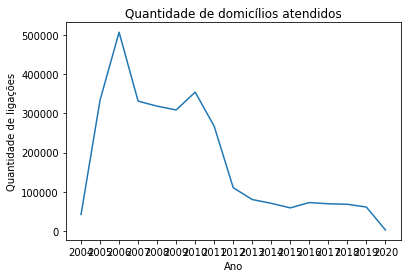

In [196]:
fig, ax= plt.subplots()
sns.lineplot(data=Ligações, x="lpt1ano", y="lpt1qtddomicilios")
ax.set_title("Quantidade de domicílios atendidos")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de ligações")
plt.show()

Interpretação: A maior parte das ligações foi realizada nos anos iniciais do programa

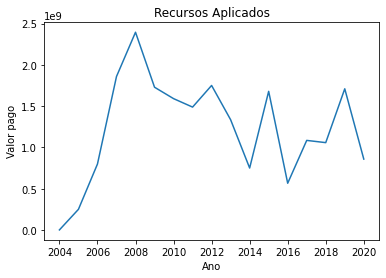

In [197]:
fig, ax= plt.subplots()
sns.lineplot(data=Recursos, x="lpt2anoup", y="Valor_Total_Pago")
ax.set_title("Recursos Aplicados")
ax.set_ylabel("Valor pago")
ax.set_xlabel("Ano")
plt.show()


Interpretação: A queda no fluxo dos pagamentos não acompanhou a queda no número de ligações. Uma possível causa é que, para cada contrato, a data considerada foi a do último pagamento, mesmo que o contrato tenha tido desembolsos anteriores. Outra possível causa seria o aumento do custo por ligação ao longo do tempo

In [198]:
def determina_regiao(uf):
    if uf in (" (DF)" , " (MS)" , " (MT)" , " (GO)"):
        return "CO"
    if uf in ( " (AC)" , " (RO)" , " (PA)"):
        return "N"
    if uf in (" (BA)" , " (MA)" , " (PB)" , " (PI)" , " (RN)"):
        return "NE"
    if uf in ( " (RS)" , " (PR)" , " (SC)"):
        return "S"
    if uf in ( " (SP)" , " (ES)" , " (MG)" , " (RJ)"):
        return "SE"
    
df1["Região"] = df1.Estado.map(determina_regiao)

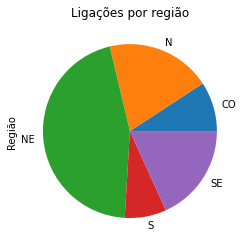

In [199]:
fig , ax = plt.subplots()
df1.groupby(['Região'])['Quantidade_total_ligações'].sum().plot.pie()
ax.set_ylabel("Região")
ax.set_title("Ligações por região")
plt.show()

Interpretação: Os atendimentos foram concentrados nas regiões Norte e Nordeste

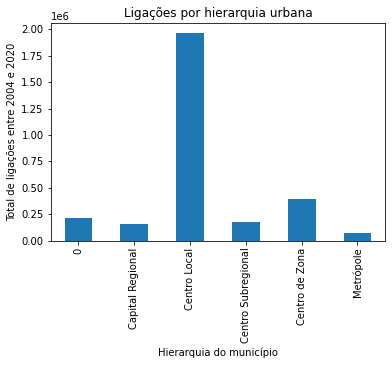

In [200]:
fig , ax = plt.subplots()
df1.groupby(['Hierarquia Urbana'])['Quantidade_total_ligações'].sum().plot.bar()
ax.set_ylabel("Total de ligações entre 2004 e 2020")
ax.set_xlabel("Hierarquia do município")
ax.set_title("Ligações por hierarquia urbana")
plt.show()


Interpretação: A quase totalidade dos domicílios atendidos está situada em pequenos municípios

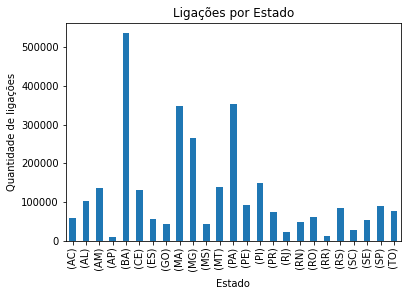

In [201]:
fig , ax = plt.subplots()
LPT1.groupby(['Estado'])['lpt1qtddomicilios'].sum().plot.bar()
ax.set_ylabel("Quantidade de ligações")
ax.set_xlabel("Estado")
ax.set_title("Ligações por Estado")
plt.show()

Interpretação: O estado que mais recebeu ligações foi a Bahia, e o que menos recebeu foi o Amapá

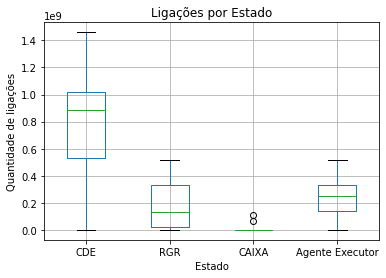

In [202]:
fig , ax = plt.subplots()
Recursos.boxplot(column=["CDE","RGR","CAIXA","Agente Executor"],ax=ax)
ax.set_ylabel("Quantidade de ligações")
ax.set_xlabel("Estado")
ax.set_title("Ligações por Estado")
plt.show()

Interpretação: Os valores repassados pela CDE são os mais expressivos: tem a maior mediana entre as fontes de recursos e a maior amplitude interquartílica. Seu primeiro quartil é superior ao 3º quartil de todas as demais fontes. Os valores de todas as fontes apresentam poucos outliers, que aparecem somente nos recursos repassados pela Caixa.

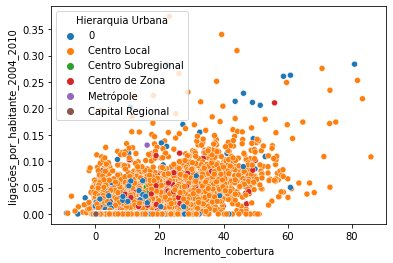

In [203]:
sns.scatterplot(x = "Incremento_cobertura",y = "ligações_por_habitante_2004_2010",hue="Hierarquia Urbana",data = df1)
plt.show()

Interpretação: A dispersão indica haver uma correlação entre as variáveis, o que já era esperado. 

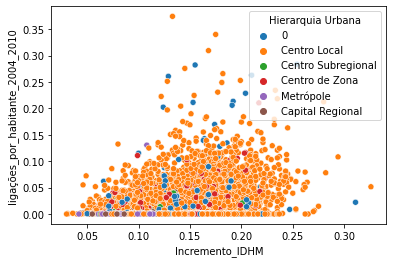

In [204]:
sns.scatterplot(x = "Incremento_IDHM",y = "ligações_por_habitante_2004_2010",hue="Hierarquia Urbana", data = df1)

Interpretação: A dispersão indica haver uma correlação moderada entre as variáveis.

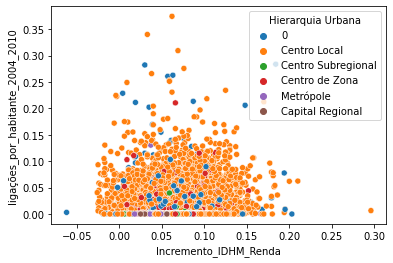

In [205]:
sns.scatterplot(x = "Incremento_IDHM_Renda",y = "ligações_por_habitante_2004_2010",hue="Hierarquia Urbana",data = df1)

Interpretação: aparentemente, as variáveis não estão correlacionadas

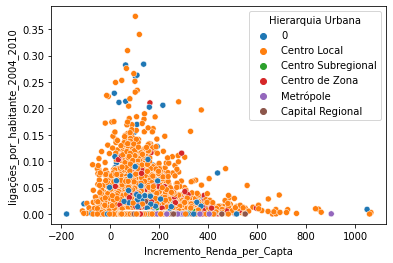

In [206]:
sns.scatterplot(x = "Incremento_Renda_per_Capta",y = "ligações_por_habitante_2004_2010",hue="Hierarquia Urbana",data = df1)

Interpretação: aparentemente, as variáveis não estão correlacionadas

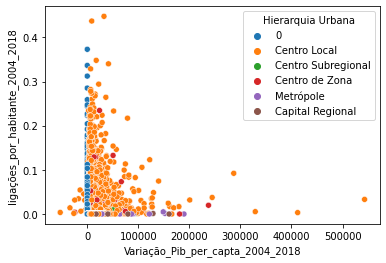

In [207]:
sns.scatterplot(x = "Variação_Pib_per_capta_2004_2018",y = "ligações_por_habitante_2004_2018",hue="Hierarquia Urbana",data = df1)

Interpretação: aparentemente, as variáveis não estão correlacionadas

# **Conclusão**
Em geral, os resultados não indicaram  uma correlação muito forte entre as ligações de energia e o desenvolvimento dos municípios beneficiados. O incremento da renda e dos índices de desenvolvimento humano é bastante complexo e depende de inúmeros fatores. A quantidade de ligações realizadas em comparação à população é pequena, e os valores envolvidos não chegam a ser expressivos a ponto de influenciar os indicadores municipais.
Isso não significa que os programas não tenham cumprido seus objetivos. Ainda que no contexto econômico dos entes nacionais os resultados não tenham sido muito impactantes, para as pessoas beneficiadas, isoladamente, pode ter sido essencial.